# NASA Space Apps Challenge FINAL CODE

In [3]:
#%pip install numpy
#%pip install pandas
#%pip install obspy 
#%pip install matplotlib

In [4]:
# Import Libraries

import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

# Read the TEST.csv Data

In [5]:
# Define the file path (THIS IS WHERE YOU CHOOSE WHICH DATA SET YOU WOULD LIKE TO USE, AND THE REST WILL AUTOMATICALLY UPDATE)
cat_file = r'C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\lunar\test\data\S12_GradeB\xa.s12.00.mhz.1970-01-09HR00_evid00007.csv'

# Extract the directory path
directory_path = os.path.dirname(cat_file)

# Extract the file name from the path and remove the .csv extension
file_name_with_extension = os.path.basename(cat_file)
file_name, _ = os.path.splitext(file_name_with_extension)  # Split the name and extension

# Display the extracted directory path and filename without the .csv extension
print("Directory Path:", directory_path)
print("File Name (without extension):", file_name)

# Read the CSV file
cat = pd.read_csv(cat_file)
print(cat)
data_cat = pd.read_csv(cat_file)

#example lunar file
# C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\lunar\test\data\S12_GradeB\xa.s12.00.mhz.1970-01-09HR00_evid00007.csv
# C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\lunar\test\data\S16_GradeB\xa.s16.00.mhz.1974-11-14HR00_evid00587.csv
# C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\lunar\test\data\S16_GradeA\xa.s16.00.mhz.1974-12-25HR00_evid00174.csv
#example mars file
# C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\mars\test\data\XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv
# C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\mars\test\data\XB.ELYSE.02.BHV.2019-07-26HR12_evid0033.csv
# C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\mars\test\data\XB.ELYSE.02.BHV.2022-05-04HR23_evid0001.csv





Directory Path: C:\Users\yman7\Downloads\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\data\lunar\test\data\S12_GradeB
File Name (without extension): xa.s12.00.mhz.1970-01-09HR00_evid00007
       time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_rel(sec)  velocity(m/s)
0          1970-01-09T00:00:00.126000       0.000000  -1.077768e-14
1          1970-01-09T00:00:00.276943       0.150943  -1.354387e-14
2          1970-01-09T00:00:00.427887       0.301887  -1.478477e-14
3          1970-01-09T00:00:00.578830       0.452830  -1.423373e-14
4          1970-01-09T00:00:00.729774       0.603774  -1.243667e-14
...                               ...            ...            ...
572418     1970-01-10T00:00:02.842981   86402.716981   2.155050e-16
572419     1970-01-10T00:00:02.993925   86402.867925  -2.200354e-15
572420     1970-01-10T00:00:03.144868   86403.018868  -3.122297e-15
572421     1970-01-10T00:00:03.295811   86403.169811  -3.687555e-15
572422     1970-01-10T00:00:03.446755   8

# Use relative time to read the data

CSV Times: [0.00000000e+00 1.50943396e-01 3.01886792e-01 ... 8.64030189e+04
 8.64031698e+04 8.64033208e+04]
CSV Data: [-1.07776825e-14 -1.35438718e-14 -1.47847680e-14 ... -3.12229720e-15
 -3.68755463e-15 -5.06104456e-15]


Text(0.5, 1.0, 'xa.s12.00.mhz.1970-01-09HR00_evid00007')

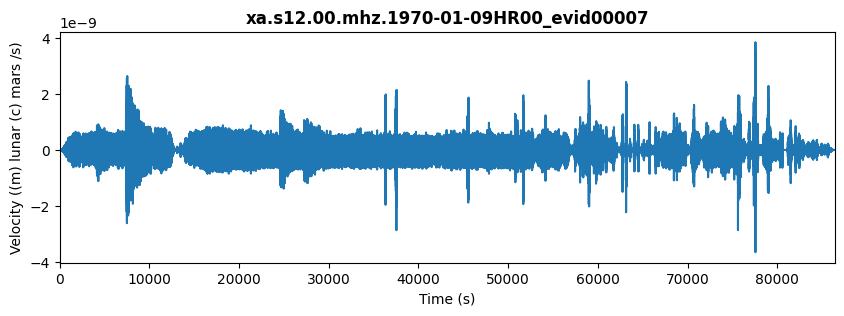

In [6]:
if 'time_rel(sec)' in data_cat.columns and 'velocity(m/s)' in data_cat.columns:
    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())
elif 'rel_time(sec)' in data_cat.columns and 'velocity(c/s)' in data_cat.columns:
    csv_times = np.array(data_cat['rel_time(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(c/s)'].tolist())


# Output the results
print("CSV Times:", csv_times)
print("CSV Data:", csv_data)


# Plot the trace! 
fig,ax = plt.subplots(1,1,figsize=(10,3)) 
ax.plot(csv_times,csv_data) #


# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity ((m) lunar (c) mars /s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{file_name}', fontweight='bold')

# Plot where the arrival time is
#arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
#ax.legend(handles=[arrival_line])

# Filter the Trace

Sometimes, it's useful to filter the trace to bring out particular frequencies. This will change the shape of the data and make it easier to see certain parts of the signal. In this example, we will filter the data using a bandpass filter between 0.01 Hz to 0.5 Hz. 

In [7]:
# Assuming 'st' is the stream read from a file, define it first
st = read(os.path.join(directory_path, file_name + '.mseed'))

# Set the minimum frequency
minfreq = 0.5
maxfreq = 1.0

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('bandpass', freqmin=minfreq, freqmax=maxfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data

C:\Users\yman7\AppData\Local\Temp\ipykernel_6108\1477998525.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


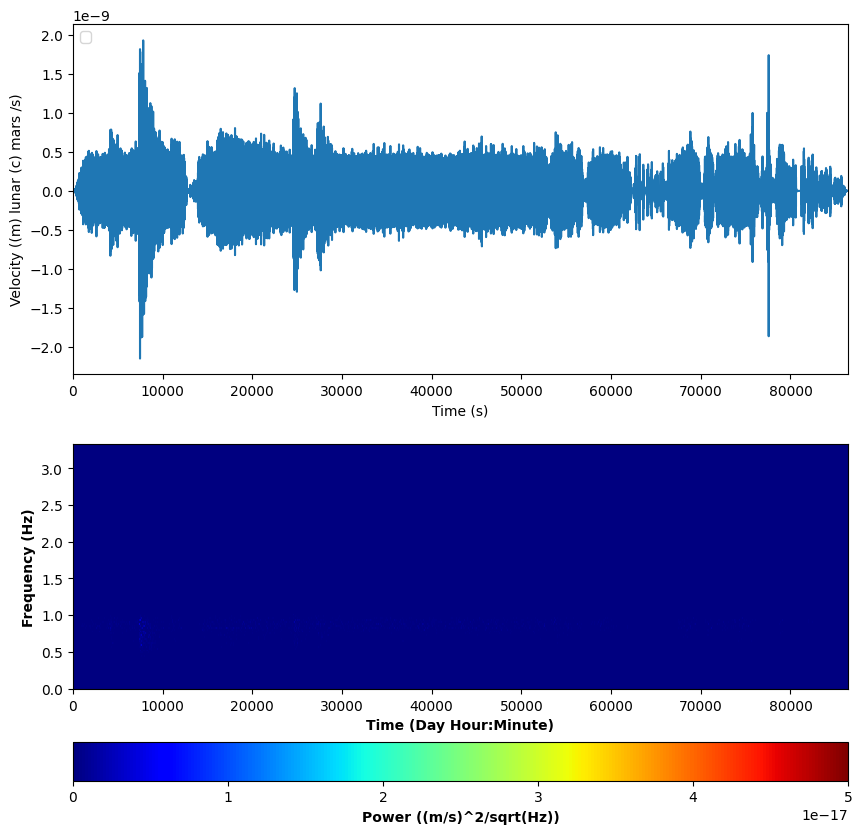

In [8]:
from matplotlib import cm
from scipy.signal import spectrogram

# Plot the time series and spectrogram
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
# Plot trace
ax.plot(tr_times_filt,tr_data_filt)

# Mark detection
#ax.axvline(x = arrival_time_rel, color='red',label='Detection')

# Compute the spectrogram
f, t, sxx = spectrogram(tr_data_filt, fs=1/(tr_times_filt[1] - tr_times_filt[0]))
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax.set_ylabel('Velocity ((m) lunar (c) mars /s)')
ax.set_xlabel('Time (s)')

ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
#ax2.axvline(x=arrival_time_rel, c='red')
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

# Sampel Short-Term Average/Long-Term Average (STA/LTA) detection algorithm

Text(0, 0.5, 'Characteristic function')

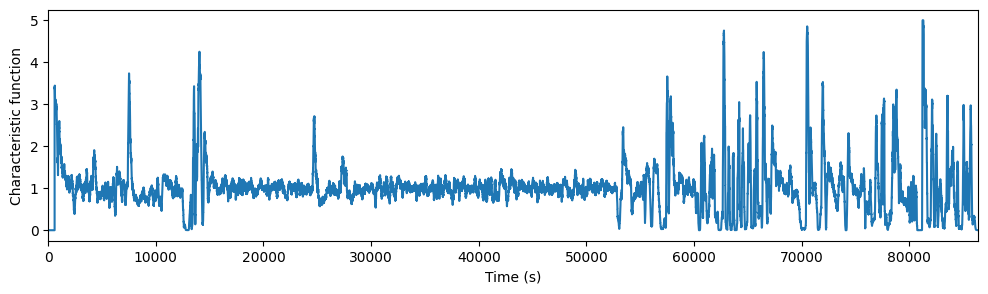

In [9]:
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset

# Sampling frequency of our trace
tr = tr_filt
df = tr.stats.sampling_rate

# How long should the short-term and long-term window be, in seconds?
sta_len = 120
lta_len = 600

# Run Obspy's STA/LTA to obtain a characteristic function
# This function basically calculates the ratio of amplitude between the short-term 
# and long-term windows, moving consecutively in time across the data
cft = classic_sta_lta(tr_data_filt, int(sta_len * df), int(lta_len * df))

# Plot characteristic function
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times_filt, cft)
ax.set_xlim([min(tr_times_filt), max(tr_times_filt)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

# Trigger the Seismic Data at Peak after Filtering

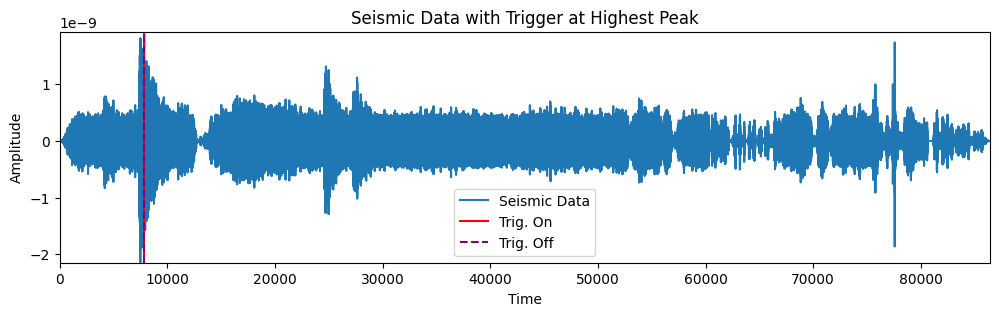

np.float64(7838.641509433963)

In [10]:
# Find the index of the maximum value in the seismic data
peak_idx = np.argmax(tr_data_filt)

# Plot the seismogram
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

# Plot the seismogram
ax.plot(tr_times_filt, tr_data_filt, label='Seismic Data')
ax.axvline(x=tr_times_filt[peak_idx], color='red', label='Trig. On')  # Trigger at peak
ax.axvline(x=tr_times_filt[peak_idx], color='purple', linestyle='dashed', label='Trig. Off')  # Off trigger same as on

# Set plot limits and legends
ax.set_xlim([min(tr_times_filt), max(tr_times_filt)])
ax.set_ylim([min(tr_data_filt), max(tr_data_filt)])  # Set limits based on data
ax.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Seismic Data with Trigger at Highest Peak')
plt.show()


#the time of the peak
peak_time = tr_times_filt[peak_idx]
peak_time






# Export into a file

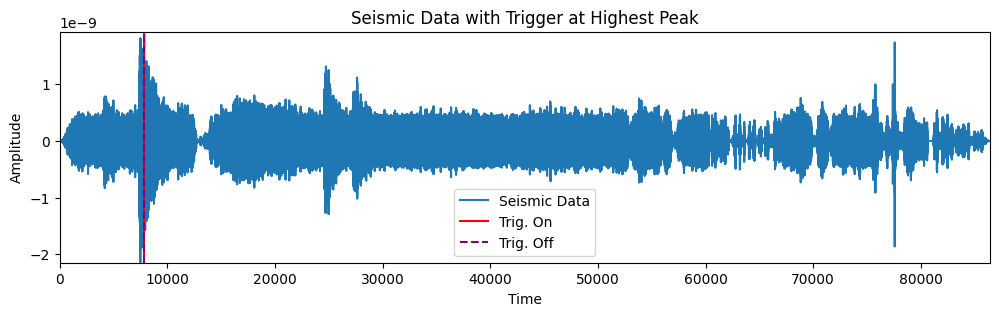

                                 filename time_abs(%Y-%m-%dT%H:%M:%S.%f)  \
0  xa.s12.00.mhz.1970-01-09HR00_evid00007     1970-06-26T22:13:38.641509   

   time_rel(sec)  
0    7838.641509  


In [11]:

# Find the index of the maximum value in the seismic data
peak_idx = np.argmax(tr_data_filt)

# Plot the seismogram
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

# Plot the seismogram
ax.plot(tr_times_filt, tr_data_filt, label='Seismic Data')
ax.axvline(x=tr_times_filt[peak_idx], color='red', label='Trig. On')  # Trigger at peak
ax.axvline(x=tr_times_filt[peak_idx], color='purple', linestyle='dashed', label='Trig. Off')  # Off trigger same as on

# Set plot limits and legends
ax.set_xlim([min(tr_times_filt), max(tr_times_filt)])
ax.set_ylim([min(tr_data_filt), max(tr_data_filt)])  # Set limits based on data
ax.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Seismic Data with Trigger at Highest Peak')
plt.show()

# The time of the peak
peak_time = tr_times_filt[peak_idx]

# Mocking the row and trace objects for demonstration
class MockRow:
    filename = file_name

class MockTrace:
    stats = type('stats', (), {'starttime': datetime(1970, 6, 26, 20, 3)})()

row = MockRow()  # Mocking the row object
tr = MockTrace()  # Mocking the trace object

fname = row.filename
starttime = tr.stats.starttime

# Iterate through detection times and compile them
detection_times = []
fnames = []
on_off = [[peak_idx]]  # Mocking the on_off list for demonstration; replace with your actual logic

for i in np.arange(0, len(on_off)):
    triggers = on_off[i]
    on_time = starttime + timedelta(seconds=tr_times_filt[triggers[0]])  # Fix applied here
    on_time_str = on_time.strftime('%Y-%m-%dT%H:%M:%S.%f')
    detection_times.append(on_time_str)
    fnames.append(fname)

# Compile DataFrame of detections
detect_df = pd.DataFrame(data={
    'filename': fnames,
    'time_abs(%Y-%m-%dT%H:%M:%S.%f)': detection_times,
    'time_rel(sec)': [tr_times_filt[triggers[0]]]
})

# Save the DataFrame to a CSV file with the specified filename
detect_df.to_csv(fname + '.csv', index=False)

# Display the DataFrame
print(detect_df)
